In [16]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

samples = ["Ju_Mi", "Ad_Ma", "Ad_Fe"]

In [17]:
def load_lengths(path):
    lengths = []
    with gzip.open(path, "rt") as f:
        for i, line in enumerate(f):
            if i % 2 == 1:
                lengths.append(len(line) - 1)
    return lengths

array = [load_lengths("../../2_analysis_of_iso_seq/results/smrt/min_passes_4/polished/%s.hq.fasta.gz" % sample) for sample in samples]

In [34]:
def get_n50(values):
    values = list(sorted(values, reverse=True))
    mid = sum(values) / 2
    s = 0
    for v in values:
        s += v
        if s >= mid:
            return v

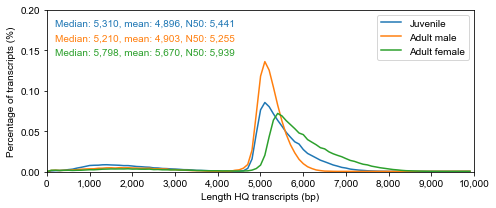

In [44]:
width = 100
labels = [
    "Juvenile",
    "Adult male",
    "Adult female"
]

plt.figure(figsize=(7, 3))
for i, lengths in enumerate(array):
    ys = np.arange(100)
    for v in lengths:
        j = int(v / 100)
        if j < len(ys):
            ys[j] += 1
    ys = ys * 100 / len(lengths) / width
    xs = np.arange(100) * width + width / 50
    plt.plot(xs, ys, label=labels[i])
    
    median = np.median(lengths)
    mean = np.mean(lengths)
    n50 = get_n50(lengths)
    plt.text(200, 0.18 - i * 0.018, "Median: %s, mean: %s, N50: %s" % (
        format(int(median), ","), format(int(mean), ","), format(n50, ",")), color="C%d" % i)
    
plt.xlim(0, 10000)
plt.ylim(0, 0.2)
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
xs = np.arange(0, 10000 + 1, 1000)
plt.xticks(xs, [format(x, ",") for x in xs])
plt.xlabel("Length HQ transcripts (bp)")
plt.ylabel("Percentage of transcripts (%)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/length_distribution_of_hq_transcripts.pdf", dpi=300)